In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aliceinwonderland/alice-in-wonderland.txt


In [2]:
file1 = open('../input/aliceinwonderland/alice-in-wonderland.txt', 'r')
txt = file1.read()

txt = txt.lower()

In [3]:
# REmoving Puncation
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(txt)[:10]

['project',
 'gutenberg',
 's',
 'alice',
 's',
 'adventures',
 'in',
 'wonderland',
 'by',
 'lewis']

In [4]:
txt

'project gutenberg\'s alice\'s adventures in wonderland, by lewis carroll\n\nthis ebook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  you may copy it, give it away or\nre-use it under the terms of the project gutenberg license included\nwith this ebook or online at www.gutenberg.org\n\n\ntitle: alice\'s adventures in wonderland\n\nauthor: lewis carroll\n\nposting date: june 25, 2008 [ebook #11]\nrelease date: march, 1994\n[last updated: december 20, 2011]\n\nlanguage: english\n\ncharacter set encoding: ascii\n\n*** start of this project gutenberg ebook alice\'s adventures in wonderland ***\n\n\n\n\n\n\n\n\n\n\nalice\'s adventures in wonderland\n\nlewis carroll\n\nthe millennium fulcrum edition 3.0\n\n\n\n\nchapter i. down the rabbit-hole\n\nalice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conv

In [5]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [6]:
from nltk import sent_tokenize
sentences = sent_tokenize(txt)

In [7]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(txt)

In [8]:
# Removing all tokens that are not alphabetic
words = [word for word in tokens if word.isalpha()]

In [9]:
words[:10]

['project',
 'gutenberg',
 'alice',
 'adventures',
 'in',
 'wonderland',
 'by',
 'lewis',
 'carroll',
 'this']

In [10]:
# Removing stop words

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]


In [11]:
# Stemming the words 
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stemmed = [porter.stem(word) for word in words]


# **Text is cleaned** !!

In [12]:
stemmed[:10]

['project',
 'gutenberg',
 'alic',
 'adventur',
 'wonderland',
 'lewi',
 'carrol',
 'ebook',
 'use',
 'anyon']

In [13]:
final = stemmed

In [14]:
# Without stemming the words
words[:10]

['project',
 'gutenberg',
 'alice',
 'adventures',
 'wonderland',
 'lewis',
 'carroll',
 'ebook',
 'use',
 'anyone']

In [15]:
from collections import Counter
counts = Counter(words)

counts

Counter({'project': 87,
         'gutenberg': 30,
         'alice': 401,
         'adventures': 12,
         'wonderland': 8,
         'lewis': 4,
         'carroll': 4,
         'ebook': 9,
         'use': 29,
         'anyone': 5,
         'anywhere': 3,
         'cost': 4,
         'almost': 8,
         'restrictions': 2,
         'whatsoever': 2,
         'may': 28,
         'copy': 12,
         'give': 13,
         'away': 28,
         'terms': 22,
         'license': 15,
         'included': 3,
         'online': 4,
         'title': 1,
         'author': 1,
         'posting': 1,
         'date': 4,
         'june': 1,
         'release': 1,
         'march': 35,
         'last': 34,
         'updated': 2,
         'december': 1,
         'language': 1,
         'english': 7,
         'character': 2,
         'set': 23,
         'encoding': 1,
         'ascii': 3,
         'start': 3,
         'millennium': 1,
         'fulcrum': 1,
         'edition': 2,
         'chapter': 12,

In [16]:
len(counts)

2767

# First divide the words into clusters that are relevant to each other
# Then try plotting them using TSNE
# Then HYPERBOLIC EMBEDDINGS !!

# Dividing the words into relevant clusters

# Visualizing the frequencies of words

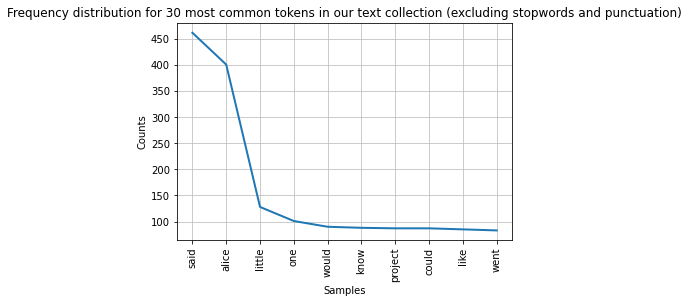

In [17]:
from nltk import FreqDist

fdist_filtered = FreqDist(words)
fdist_filtered.plot(10, title = 'Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)')

Hmmmmm. 
Not much info can be extracted using Frequency of words in a corpus. 

Let's try **Knowledge Graphs**

In [20]:
import re # For preprocessing 
import pandas as pd # For data handling
from time import time # To time our operations
from collections import defaultdict # For word frequency

import spacy # For preprocessing

import logging # Set up loggings to monitor gensim
logging.basicConfig(format = "%(levelname)s - %(asctime)s: %(message)s", 
                   datefmt = '%H:%M:%S', level=logging.INFO)

# Using Sentence Tokenizer

In [21]:
from nltk import sent_tokenize

file1 = open('../input/aliceinwonderland/alice-in-wonderland.txt', 'r')
txt = file1.read()
sentences = sent_tokenize(txt)

In [24]:
sentences[:10]

["Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.",
 "You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice's Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nPosting Date: June 25, 2008 [EBook #11]\nRelease Date: March, 1994\n[Last updated: December 20, 2011]\n\nLanguage: English\n\nCharacter set encoding: ASCII\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***\n\n\n\n\n\n\n\n\n\n\nALICE'S ADVENTURES IN WONDERLAND\n\nLewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\nCHAPTER I.",
 "Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or c

# 1. Substituting \n (new line) escape sequence with blank

# 2. Removing stopwords

In [25]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import re

field = []

for line in sentences: 
    
    x = re.sub(r'\n',r' ',line)
    words = [w for w in str(x) if not w in stop_words]
    
    field.append(str(x))
    
field
    

["Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll  This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.",
 "You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org   Title: Alice's Adventures in Wonderland  Author: Lewis Carroll  Posting Date: June 25, 2008 [EBook #11] Release Date: March, 1994 [Last updated: December 20, 2011]  Language: English  Character set encoding: ASCII  *** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***           ALICE'S ADVENTURES IN WONDERLAND  Lewis Carroll  THE MILLENNIUM FULCRUM EDITION 3.0     CHAPTER I.",
 "Down the Rabbit-Hole  Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, 'and what is the use of 

# Creating a dataframe for the filtered data

In [27]:
df = pd.DataFrame(field)

In [29]:
df.head()

0
0  Project Gutenberg's Alice's Adventures in Wond...
1  You may copy it, give it away or re-use it und...
2  Down the Rabbit-Hole  Alice was beginning to g...
3  So she was considering in her own mind (as wel...
4  There was nothing so VERY remarkable in that; ...

In [30]:
df.isnull().sum()

0    0
dtype: int64

# No null data. Awesome !

In [31]:
df_clean = df.drop_duplicates()

In [32]:
df_clean.shape

(1692, 1)

In [33]:
from gensim.models.phrases import Phrases, Phraser

In [34]:
sent = df_clean

In [36]:
sent.head()

0
0  Project Gutenberg's Alice's Adventures in Wond...
1  You may copy it, give it away or re-use it und...
2  Down the Rabbit-Hole  Alice was beginning to g...
3  So she was considering in her own mind (as wel...
4  There was nothing so VERY remarkable in that; ...

In [37]:
phrases = Phrases(sent[0], min_count=30, progress_per = 10000)

bigram = Phraser(phrases)

In [38]:
sentences = bigram[sent[0]]

In [41]:
sentences[:10]

["Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll  This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.",
 "You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org   Title: Alice's Adventures in Wonderland  Author: Lewis Carroll  Posting Date: June 25, 2008 [EBook #11] Release Date: March, 1994 [Last updated: December 20, 2011]  Language: English  Character set encoding: ASCII  *** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***           ALICE'S ADVENTURES IN WONDERLAND  Lewis Carroll  THE MILLENNIUM FULCRUM EDITION 3.0     CHAPTER I.",
 "Down the Rabbit-Hole  Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, 'and what is the use of 

In [46]:
from nltk.tokenize import word_tokenize

tokenized_sentences=[]

for s in sentences:
    
    tokenized_sentences.append(word_tokenize(s.lower()))

# Tokenizing words within the Sentences
tokenized_sentences[:10]

[['project',
  'gutenberg',
  "'s",
  'alice',
  "'s",
  'adventures',
  'in',
  'wonderland',
  ',',
  'by',
  'lewis',
  'carroll',
  'this',
  'ebook',
  'is',
  'for',
  'the',
  'use',
  'of',
  'anyone',
  'anywhere',
  'at',
  'no',
  'cost',
  'and',
  'with',
  'almost',
  'no',
  'restrictions',
  'whatsoever',
  '.'],
 ['you',
  'may',
  'copy',
  'it',
  ',',
  'give',
  'it',
  'away',
  'or',
  're-use',
  'it',
  'under',
  'the',
  'terms',
  'of',
  'the',
  'project',
  'gutenberg',
  'license',
  'included',
  'with',
  'this',
  'ebook',
  'or',
  'online',
  'at',
  'www.gutenberg.org',
  'title',
  ':',
  'alice',
  "'s",
  'adventures',
  'in',
  'wonderland',
  'author',
  ':',
  'lewis',
  'carroll',
  'posting',
  'date',
  ':',
  'june',
  '25',
  ',',
  '2008',
  '[',
  'ebook',
  '#',
  '11',
  ']',
  'release',
  'date',
  ':',
  'march',
  ',',
  '1994',
  '[',
  'last',
  'updated',
  ':',
  'december',
  '20',
  ',',
  '2011',
  ']',
  'language',
  ':'

# A New Approach
# Creating Knowledge graphs from https://www.kaggle.com/pavansanagapati/knowledge-graph-nlp-tutorial-bert-spacy-nltk

In [47]:
import re
import pandas as pd
import bs4
import requests
import spacy

import networkx as nx
import matplotlib.pyplot as plt

from spacy import displacy
from spacy.matcher import Matcher
from spacy.tokens import Span
from tqdm import tqdm

nlp = spacy.load('en_core_web_sm')

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [48]:
# import wikipedia sentences

candidate_sentence = pd.DataFrame(sentences)

In [49]:
candidate_sentence.head()

0
0                              Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll  This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.
1  You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org   Title: Alice's Adventures in Wonderland  Autho...
2  Down the Rabbit-Hole  Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, bu...
3  So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of gett...
4                                                             There was nothing so VERY remarkable in that; nor did Alice think it so VERY much out of the way to hear the Rabbit say to itself, 'Oh dear!

In [50]:
candidate_sentence[0].sample(5)

720     'I've seen hatters before,' she said to herself; 'the March Hare will be much the most interesting, and perhaps as this is May it won't be raving mad--at least not so mad as it was in March.'
399                                                                                                                                                   'What a number of cucumber-frames there must be!'
1544                                                                                                                                                                              he said to the Queen.
340                                                                          Only I don't think,' Alice went on, 'that they'd let Dinah stop in the house if it began ordering people about like that!'
304                                                                                                                                          This speech caused a remarkable sensation among the party.


# Sentence segmentation

We will shortlist only those sentences in which there is exactly 1 subject and 1 object

In [51]:
doc = nlp('the drawdown process is governed by astm standard d823')

for tok in doc:
    
    print(tok.text, "...", tok.dep_)

the ... det
drawdown ... amod
process ... nsubjpass
is ... auxpass
governed ... ROOT
by ... agent
astm ... compound
standard ... amod
d823 ... pobj


Function to extract subject and object (entities) from a sentence while also overcoming challenges such as getting nodes and edges between them.

Have divided the code into multiple chunks for easy understanding

We will extract these elements in an unsupervised manner i.e., we will use the grammar of the sentences

In [54]:


def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]



In [53]:
get_entities("the film had 200 patents")


['film', '200  patents']

**Extracting Entities from Corpus**

In [55]:
entity_pairs = []

for i in tqdm(candidate_sentence[0]):
  entity_pairs.append(get_entities(i))

100%|██████████| 1692/1692 [00:20<00:00, 82.12it/s]


**Nodes are extracted**

**Now , we need EDGES i.e. Relation between the Nodes**

In [56]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [57]:
get_relation("John completed the task")

'completed'

**Extracting Relations from Corpus**

In [58]:
relations = [get_relation(i) for i in tqdm(candidate_sentence[0])]

100%|██████████| 1692/1692 [00:19<00:00, 87.09it/s]


Finding frequency of words

In [59]:
pd.Series(relations).value_counts()[:50]

said         275
was           65
's            36
is            30
thought       25
went          24
said to       20
know          17
think         17
began         16
replied       15
'             14
are           13
asked         13
wonder        12
be            12
had           12
wish          12
cried         12
got           11
tell          11
looked        10
have           9
do             9
like           9
suppose        8
took           8
say            8
sat            7
did            7
were           7
added          7
remarked       6
Come           6
with           6
tried          6
go             6
'm             6
repeated       6
came           6
looked at      6
see            6
get            6
Alice          5
sighed         5
beginning      5
come           5
getting        5
join           5
make           5
dtype: int64

# Build Knowledge Graph

In [60]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [61]:


# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())



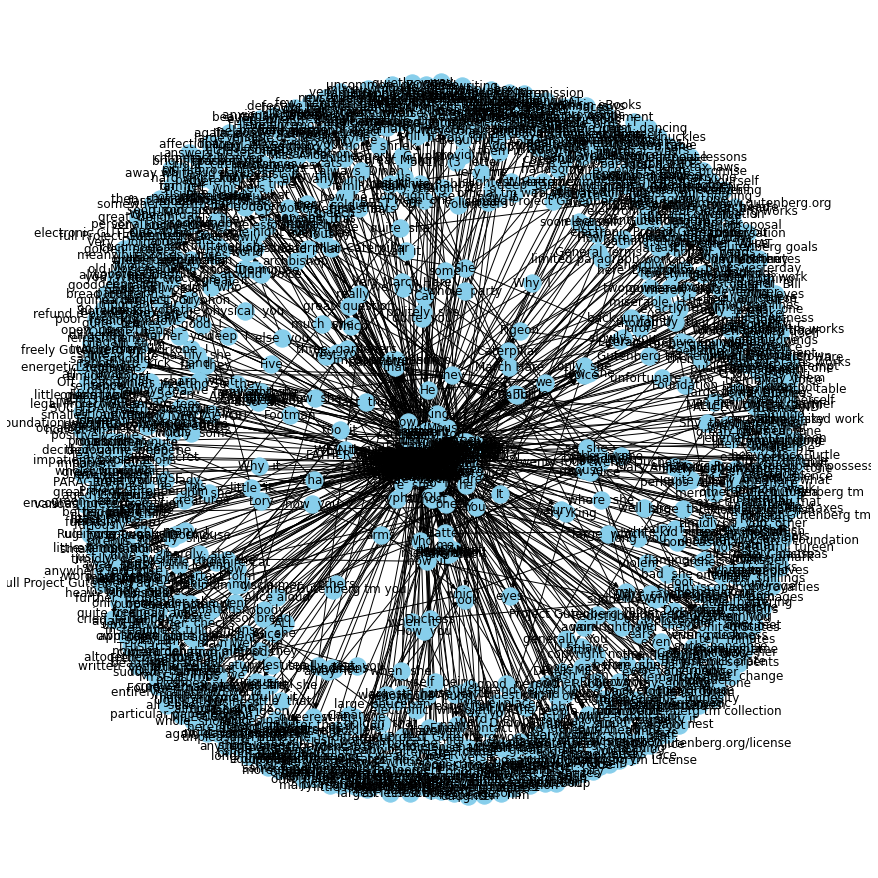

In [62]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

> Not what we were expecting 

Seems like this can be much better represented in **Hyperbolic Space**

**Checking the graphs for different WORDS**

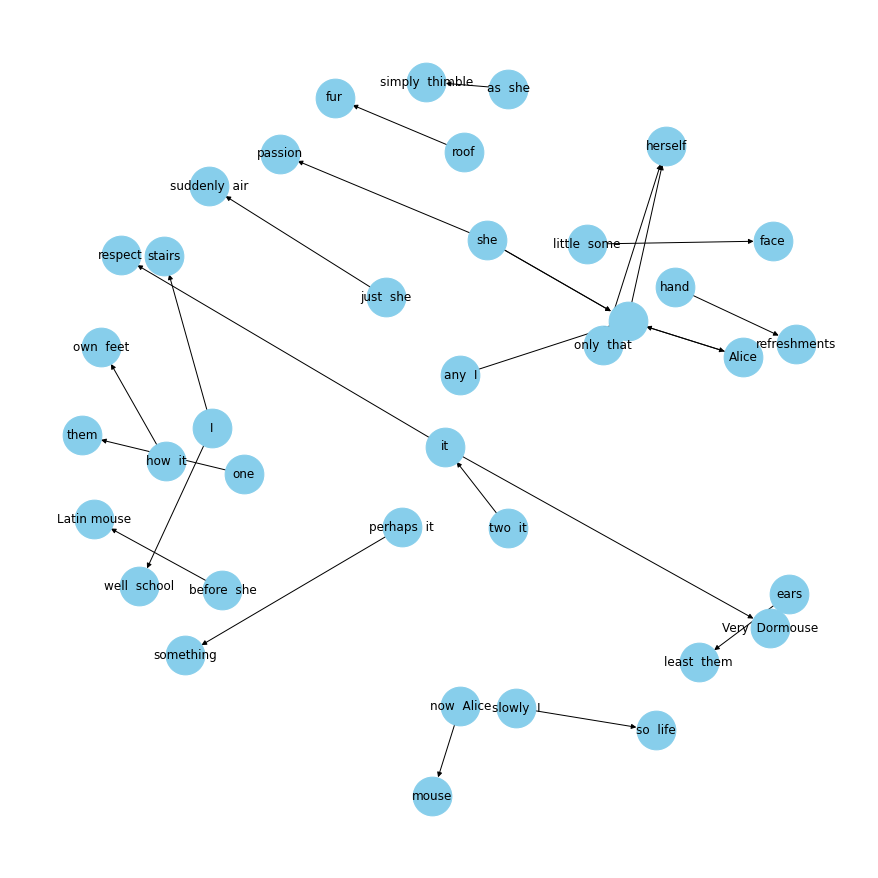

In [63]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="thought"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes

#pos = graphviz_layout(G, prog="twopi", args = "") #for circular graph
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

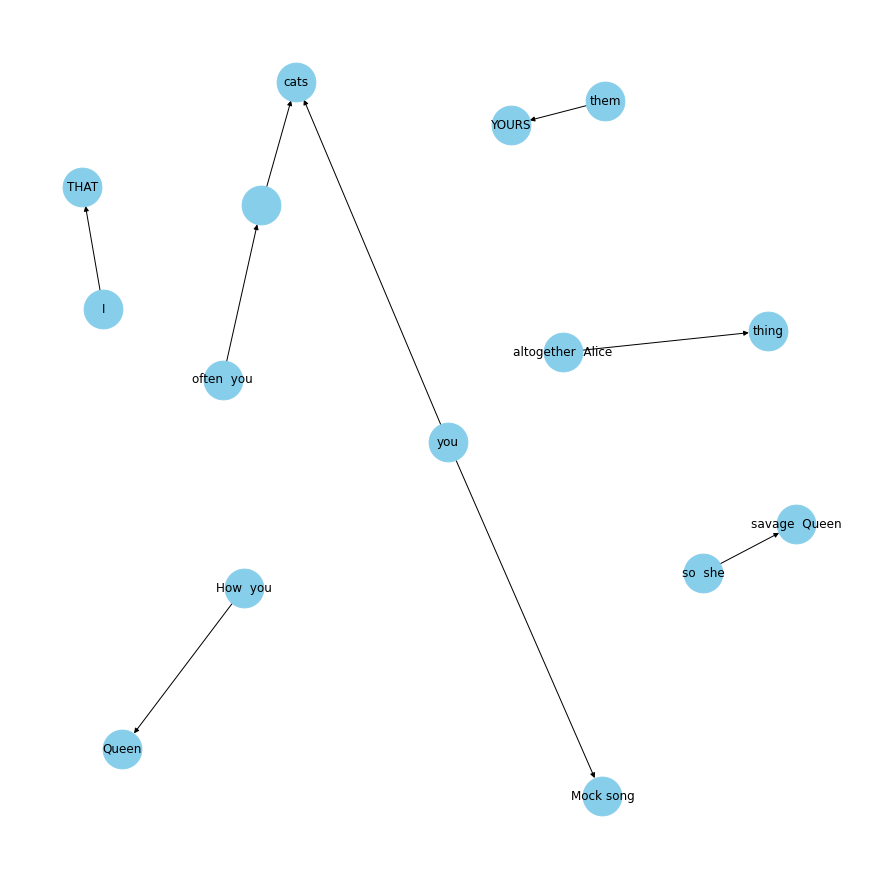

In [64]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="like"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

Degree of Graph : Number of Edges adjacent to the node. 

In [65]:
G.degree

DiMultiDegreeView({'': 2, 'cats': 2, 'you': 2, 'I': 1, 'THAT': 1, 'often  you': 1, 'them': 1, 'YOURS': 1, 'altogether  Alice': 1, 'thing': 1, 'How  you': 1, 'Queen': 1, 'so  she': 1, 'savage  Queen': 1, 'Mock song': 1})

Graph Edges : 

In [66]:
G.edges()

OutMultiEdgeDataView([('', 'cats'), ('you', 'cats'), ('you', 'Mock song'), ('I', 'THAT'), ('often  you', ''), ('them', 'YOURS'), ('altogether  Alice', 'thing'), ('How  you', 'Queen'), ('so  she', 'savage  Queen')])

In [67]:
L = G.number_of_nodes()
L

15

# Trying out POINCARE EMBEDDINGS ( GENSIM )

models.poincare : [Train and Use Poincare Embeddings](http://https://radimrehurek.com/gensim/models/poincare.html)

In [75]:
 !pip install --upgrade gensim

Requirement already up-to-date: gensim in /opt/conda/lib/python3.7/site-packages (3.8.3)
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [76]:
from gensim.models.poincare import PoincareRelations
from gensim.models.poincare import PoincareModel
from gensim.models import KeyedVectors

In [77]:
entity_pairs[:10]

[['Lewis eBook', 'no  restrictions'],
 ['MILLENNIUM FULCRUM', 'ALICE WONDERLAND'],
 ['Alice', 'pictures'],
 ['suddenly White Rabbit', 'close  her'],
 ['much  Rabbit', 'itself'],
 ['', ''],
 ['I', ''],
 ['just  it', 'large rabbit hedge'],
 ['how  she', 'how  world'],
 ['herself', 'herself']]

In [78]:
# Size is required for 2d plotting

model = PoincareModel(entity_pairs, negative = 4)



Training the model

In [79]:
model.train(epochs = 100)

# Visualizing the poincare embedding

In [80]:
from gensim.viz import poincare

In [81]:
import gensim

In [83]:
relations[:10]

['is for',
 'EDITION',
 'beginning',
 'considering in',
 'was',
 'dear',
 'be late',
 'ran across',
 'went',
 'went']

In [86]:
from gensim.models import KeyedVectors
# from gensim.test.utils import lee_corpus_list

from gensim.models import Word2Vec


result = model.kv.most_similar("Alice")

In [87]:
result

[('quite  conversation', 0.06961523388468022),
 ('great  conversation', 0.08559626412289235),
 ('timidly  door', 0.08657112204109557),
 ('curiosity', 0.08716410403812558),
 ('melancholy  voice', 0.09107392492482717),
 ('rabbit', 0.09157891939692273),
 ('back croquet ground', 0.09388738283474611),
 ('pictures', 0.09681384423692078),
 ('unwillingly March Hare', 0.10101194403810897),
 ('explanation', 0.10312770516860699)]

In [88]:
model

In [89]:
fig = gensim.viz.poincare.poincare_2d_visualization(model,tuple(entity_pairs), 'Exp', num_nodes = 10, show_node_labels = ())

# Error since the model does not have a dimensionality 2

ValueError: Can only plot 2-D vectors

Error is for syn0 value .

Checking the value 

In [90]:
model.kv.syn0

array([[ 0.11281215, -0.01777838,  0.23162607, ..., -0.19112538,
         0.12764664, -0.16298474],
       [ 0.10069644, -0.01630813,  0.20690683, ..., -0.17059662,
         0.11403305, -0.14538499],
       [-0.0501706 , -0.02658397,  0.1184735 , ...,  0.08016141,
         0.13804129,  0.12294469],
       ...,
       [-0.00645399,  0.14587946,  0.01786221, ..., -0.05328358,
        -0.05689496,  0.05549152],
       [-0.05175793, -0.05678449, -0.05127103, ..., -0.04641923,
        -0.06315655,  0.02335646],
       [-0.04504338, -0.05013515, -0.04460077, ..., -0.04049475,
        -0.0553879 ,  0.01987256]])

In [91]:
model.kv.distance("Alice", "little")

3.424926865811934

In [93]:
entity_pairs[:10]

[['Lewis eBook', 'no  restrictions'],
 ['MILLENNIUM FULCRUM', 'ALICE WONDERLAND'],
 ['Alice', 'pictures'],
 ['suddenly White Rabbit', 'close  her'],
 ['much  Rabbit', 'itself'],
 ['', ''],
 ['I', ''],
 ['just  it', 'large rabbit hedge'],
 ['how  she', 'how  world'],
 ['herself', 'herself']]

# Creating a New Model in 2 D 

In [95]:
# model in 2D

model = PoincareModel(entity_pairs, negative = 4, size = 2)


# Visualizing 

In [96]:
from gensim.models.poincare import PoincareRelations
from gensim.test.utils import datapath


relation_gensim = PoincareRelations(model)

import plotly

import gensim.viz.poincare

plotly.offline.init_notebook_mode(connected = False)

fig = gensim.viz.poincare.poincare_2d_visualization(model = model, 
                                           tree = entity_pairs, 
                                           figure_title = "tutorial",
                                           )

plotly.offline.iplot(fig)

**This certainly looks Messy**

Let's drill some more

In [98]:
model.kv.closest_child("Alice")

'good Mock Turtle'

Taking example from an implementation I found on GitHub ( https://github.com/harmanpreet93/poincare-embedding-using-gensim/blob/master/poincare-embeddings-using-gensim.ipynb )

In [99]:
# https://github.com/harmanpreet93/poincare-embedding-using-gensim/blob/master/poincare-embeddings-using-gensim.ipynb
new_model = PoincareModel(train_data = entity_pairs,
                          size = 2,
                          burn_in = 0,
                          workers = 1,
                          negative = 10)

# Difference : burn_in initialization

# Older Model training step done : 
# model = PoincareModel(entity_pairs, negative = 4, size = 2)

new_model.train(epochs = 100, print_every = 400, batch_size = 10)

In [100]:
from gensim.viz.poincare import poincare_2d_visualization, poincare_distance_heatmap

fig = poincare_2d_visualization(
    new_model,
    entity_pairs,
    "Poincare Hierarchy",
    show_node_labels=entity_pairs)

In [101]:
fig

# Perfecto

# Creating a model NOT in 2D to plot it using TSNE. 

# It's interesting you'll see

In [102]:
new_model_without_2d = PoincareModel(train_data = entity_pairs,
                          burn_in = 0,
                          workers = 1,
                          negative = 10)

new_model_without_2d.train(epochs = 100, print_every = 400, batch_size = 10)

In [103]:
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

tsne_model = TSNE(n_components = 3, verbose = 1, random_state = 0, angle = .99, init = 'pca', perplexity = 40)

tsne_poincare = tsne_model.fit_transform(new_model_without_2d.kv[new_model_without_2d.kv.vocab])


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1467 samples in 0.008s...
[t-SNE] Computed neighbors for 1467 samples in 0.249s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1467
[t-SNE] Computed conditional probabilities for sample 1467 / 1467
[t-SNE] Mean sigma: 0.136062
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.014786
[t-SNE] KL divergence after 1000 iterations: 0.708591


Plotting the graph using **matplotlib's 3D Toolkit**

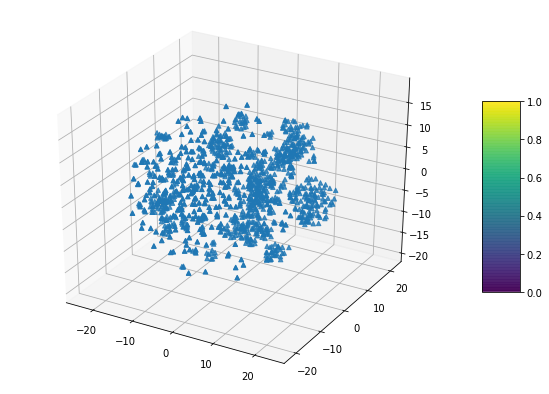

In [104]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

#fog = plt.scatter(tsne_poincare[:, 0], tsne_poincare[:, 1],tsne_poincare[:, 2], cmap = 'RdBu')

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection="3d")

#ax.scatter3D(*zip(*tsne_poincare))
sctt = ax.scatter3D(tsne_poincare[:, 0], tsne_poincare[:, 1],tsne_poincare[:, 2],
            alpha = 0.8,
            cmap = plt.get_cmap('hsv'),
            marker = '^')

fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
plt.show()
plt.show()

Checkign the Vocabulary

In [111]:
model.kv.vocab

{'Lewis eBook': <gensim.models.keyedvectors.Vocab at 0x7f72c13efe90>,
 'no  restrictions': <gensim.models.keyedvectors.Vocab at 0x7f72c13ef910>,
 'MILLENNIUM FULCRUM': <gensim.models.keyedvectors.Vocab at 0x7f72c13ef8d0>,
 'ALICE WONDERLAND': <gensim.models.keyedvectors.Vocab at 0x7f72c13ef890>,
 'Alice': <gensim.models.keyedvectors.Vocab at 0x7f72c13ef990>,
 'pictures': <gensim.models.keyedvectors.Vocab at 0x7f72c13efd50>,
 'suddenly White Rabbit': <gensim.models.keyedvectors.Vocab at 0x7f72c1462f10>,
 'close  her': <gensim.models.keyedvectors.Vocab at 0x7f72c1462a10>,
 'much  Rabbit': <gensim.models.keyedvectors.Vocab at 0x7f72c1462510>,
 'itself': <gensim.models.keyedvectors.Vocab at 0x7f72c13efcd0>,
 '': <gensim.models.keyedvectors.Vocab at 0x7f72c1462dd0>,
 'I': <gensim.models.keyedvectors.Vocab at 0x7f72c1462610>,
 'just  it': <gensim.models.keyedvectors.Vocab at 0x7f72c1462590>,
 'large rabbit hedge': <gensim.models.keyedvectors.Vocab at 0x7f72c14622d0>,
 'how  she': <gensim.mod

In [112]:
model.kv[model.kv.vocab]

array([[ 9.76270079e-05,  4.30378733e-04],
       [ 2.05526752e-04,  8.97663660e-05],
       [-1.52690401e-04,  2.91788226e-04],
       ...,
       [-6.92666914e-04, -1.11012553e-04],
       [-9.80734565e-06,  9.79531014e-04],
       [-9.15224232e-04, -3.97689602e-04]])

In [113]:
import plotly.express as px

fig = plt.figure(figsize = (20, 20))

fig = px.scatter_3d(df, x=tsne_poincare[:, 0], y=tsne_poincare[:, 1], z=tsne_poincare[:, 2],
                    color= tuple(new_model_without_2d.kv.vocab),
                    title="3D Scatter Plot")


fig.show()



<Figure size 1440x1440 with 0 Axes>

# Now That's Something. The whole Hyperbolic Word Embedding in 3D using Plotly

Checking the Vocabulary of the model created (More than 2 Dimensions)

In [114]:
new_model_without_2d.kv.vocab

{'Lewis eBook': <gensim.models.keyedvectors.Vocab at 0x7f72c089e110>,
 'no  restrictions': <gensim.models.keyedvectors.Vocab at 0x7f72c089e190>,
 'MILLENNIUM FULCRUM': <gensim.models.keyedvectors.Vocab at 0x7f72c089e1d0>,
 'ALICE WONDERLAND': <gensim.models.keyedvectors.Vocab at 0x7f72c089e210>,
 'Alice': <gensim.models.keyedvectors.Vocab at 0x7f72c089e250>,
 'pictures': <gensim.models.keyedvectors.Vocab at 0x7f72c089e2d0>,
 'suddenly White Rabbit': <gensim.models.keyedvectors.Vocab at 0x7f72c089e310>,
 'close  her': <gensim.models.keyedvectors.Vocab at 0x7f72c089e350>,
 'much  Rabbit': <gensim.models.keyedvectors.Vocab at 0x7f72c089e390>,
 'itself': <gensim.models.keyedvectors.Vocab at 0x7f72c089e290>,
 '': <gensim.models.keyedvectors.Vocab at 0x7f72c089e410>,
 'I': <gensim.models.keyedvectors.Vocab at 0x7f72c089e450>,
 'just  it': <gensim.models.keyedvectors.Vocab at 0x7f72c089e490>,
 'large rabbit hedge': <gensim.models.keyedvectors.Vocab at 0x7f72c089e4d0>,
 'how  she': <gensim.mod

# Creating a Model for Most similar words to 'Alice' as per teh current corpus (or Vocab)

In [115]:
x = new_model_without_2d.kv.most_similar('Alice', topn = 10)

In [116]:
x

[('whole  subject', 0.20011823340614798),
 ('opinion', 0.22319633974375297),
 ('various  pretexts', 0.2251598543960733),
 ('whole  shore', 0.2272618769606706),
 ('explanation', 0.23869374812236507),
 ('melancholy  voice', 0.25034623863619787),
 ('rabbit', 0.2579818321648667),
 ('king', 0.2616592963173912),
 ('quite  conversation', 0.26313563163513115),
 ('Uglification', 0.26726832725203575)]

Object of Vectors that are closest to 'Alice'

In [118]:
new_model_without_2d.kv.vocab['Alice']

Zipping up the x object to separate Words and the Gensim Keyed Vectors

In [119]:
alice = list(zip(*x))

In [120]:
alice[0]

('whole  subject',
 'opinion',
 'various  pretexts',
 'whole  shore',
 'explanation',
 'melancholy  voice',
 'rabbit',
 'king',
 'quite  conversation',
 'Uglification')

Oh Yeah !!

Extracting a single word

In [121]:
alice[0][0]

'whole  subject'

Plotting words closest to 'Alice'

In [122]:
new_model_without_2d.kv.vocab[alice[0][9]]

In [123]:
#new_model_without_2d.kv.vocab[alice[0]]

x = {}
for i in range(10):
    
    print(alice[0][i])
    print(new_model_without_2d.kv.vocab[alice[0][i]])
    
    #x.append([alice[0][i],new_model_without_2d.kv.vocab[alice[0][i]]])
    x[alice[0][i]] = new_model_without_2d.kv.vocab[alice[0][i]]

whole  subject
Vocab(count:1, index:1121)
opinion
Vocab(count:1, index:791)
various  pretexts
Vocab(count:1, index:342)
whole  shore
Vocab(count:1, index:224)
explanation
Vocab(count:1, index:680)
melancholy  voice
Vocab(count:1, index:504)
rabbit
Vocab(count:1, index:359)
king
Vocab(count:1, index:913)
quite  conversation
Vocab(count:1, index:633)
Uglification
Vocab(count:1, index:1026)


In [126]:
new_model_without_2d.kv.vocab

{'Lewis eBook': <gensim.models.keyedvectors.Vocab at 0x7f72c089e110>,
 'no  restrictions': <gensim.models.keyedvectors.Vocab at 0x7f72c089e190>,
 'MILLENNIUM FULCRUM': <gensim.models.keyedvectors.Vocab at 0x7f72c089e1d0>,
 'ALICE WONDERLAND': <gensim.models.keyedvectors.Vocab at 0x7f72c089e210>,
 'Alice': <gensim.models.keyedvectors.Vocab at 0x7f72c089e250>,
 'pictures': <gensim.models.keyedvectors.Vocab at 0x7f72c089e2d0>,
 'suddenly White Rabbit': <gensim.models.keyedvectors.Vocab at 0x7f72c089e310>,
 'close  her': <gensim.models.keyedvectors.Vocab at 0x7f72c089e350>,
 'much  Rabbit': <gensim.models.keyedvectors.Vocab at 0x7f72c089e390>,
 'itself': <gensim.models.keyedvectors.Vocab at 0x7f72c089e290>,
 '': <gensim.models.keyedvectors.Vocab at 0x7f72c089e410>,
 'I': <gensim.models.keyedvectors.Vocab at 0x7f72c089e450>,
 'just  it': <gensim.models.keyedvectors.Vocab at 0x7f72c089e490>,
 'large rabbit hedge': <gensim.models.keyedvectors.Vocab at 0x7f72c089e4d0>,
 'how  she': <gensim.mod

Error : because the word is a dictionary and not a list

In [127]:
tsne_poincare = tsne_model.fit_transform(new_model_without_2d.kv[x])


[t-SNE] Computing 9 nearest neighbors...
[t-SNE] Indexed 10 samples in 0.000s...
[t-SNE] Computed neighbors for 10 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 10 / 10
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.212608
[t-SNE] KL divergence after 1000 iterations: 1.474669


Visualizing them via TSNE: 

In [129]:
tsne_poincare = tsne_model.fit_transform(new_model_without_2d.kv[x])


[t-SNE] Computing 9 nearest neighbors...
[t-SNE] Indexed 10 samples in 0.000s...
[t-SNE] Computed neighbors for 10 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 10 / 10
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.212616
[t-SNE] KL divergence after 1000 iterations: 1.474669


Displaying them in 3D via Plotly

In [130]:
fig = plt.figure(figsize = (20, 20))

fig = px.scatter_3d(df, x=tsne_poincare[:, 0], y=tsne_poincare[:, 1], z=tsne_poincare[:, 2],
                    color= tuple(x),
                    title="3D Scatter Plot")


fig.show()

<Figure size 1440x1440 with 0 Axes>

# Displaying all the points similar to 'Alice' in 3D using Plotly